('Already downloaded', 'sample4.txt')


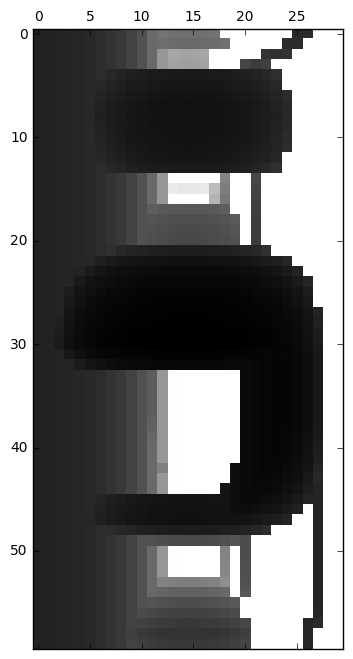

In [2]:
import os
import json
import tensorflow as tf
import numpy as np

from numpy import array
from six.moves.urllib.request import urlretrieve
import matplotlib.pyplot as plt

SOURCE_URL = 'http://pwz.mit.edu/data/train1018/'
WORK_DIRECTORY = "/train1018"

def maybe_download(filename):
    """A helper to download the data files if not present."""
    if not os.path.exists(WORK_DIRECTORY):
        os.mkdir(WORK_DIRECTORY)
    filepath = os.path.join(WORK_DIRECTORY, filename)
    if not os.path.exists(filepath):
        filepath, _ = urlretrieve(SOURCE_URL + filename, filepath)
        statinfo = os.stat(filepath)
        print('Succesfully downloaded', filename, statinfo.st_size, 'bytes.')
    else:
        print('Already downloaded', filename)
    return filepath  

test = maybe_download('sample4.txt')



with open(test, 'r') as ft:
    test_d = json.load(ft)

    test_data = []
    def normalize(lst):

        return [i/5000 for i in lst]
    for img in test_d:
        temp = []
        for row in img:
            for i in row:
                temp.append(i)
        test_data.append(temp)

    test_data = [normalize(i) for i in test_data]






    #print array(test_data)

    plt.matshow(array(np.reshape(test_data[100], (60, 30))), cmap=plt.get_cmap('gray'))
    plt.show()


In [3]:

x = tf.placeholder(tf.float32, shape=[None, 1800],name = "x")
y_ = tf.placeholder(tf.float32, shape=[None, 15],name = "y_")

def weight_variable(shape,name):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial,name)

def bias_variable(shape,name):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial,name)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#1st conv
W_conv1 = weight_variable([5, 5, 1, 32],name="W_conv1")
b_conv1 = bias_variable([32],name="b_conv1")
x_image = tf.reshape(x, [-1,60,30,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#2nd conv
W_conv2 = weight_variable([5, 5, 32, 64],name="v3")
b_conv2 = bias_variable([64],name="v4")
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#Densely Connected Layer
W_fc1 = weight_variable([15 * 8 * 64, 1024],name="v5")
b_fc1 = bias_variable([1024],name="v6")
h_pool2_flat = tf.reshape(h_pool2, [-1, 15*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout
keep_prob = tf.placeholder(tf.float32,name = "keep_prob")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#readout
W_fc2 = weight_variable([1024, 15],name="v7")
b_fc2 = bias_variable([15],name="v8")

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

sys_prediction = tf.nn.softmax(y_conv)


sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)


In [4]:
x = tf.placeholder(tf.float32, shape=[None, 1800],name = "x")
y_ = tf.placeholder(tf.float32, shape=[None, 15],name = "y_")

def weight_variable(shape,name):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial,name)

def bias_variable(shape,name):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial,name)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#1st conv
W_conv1 = weight_variable([5, 5, 1, 32],name="W_conv1")
b_conv1 = bias_variable([32],name="b_conv1")
x_image = tf.reshape(x, [-1,60,30,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#2nd conv
W_conv2 = weight_variable([5, 5, 32, 64],name="v3")
b_conv2 = bias_variable([64],name="v4")
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#Densely Connected Layer
W_fc1 = weight_variable([15 * 8 * 64, 1024],name="v5")
b_fc1 = bias_variable([1024],name="v6")
h_pool2_flat = tf.reshape(h_pool2, [-1, 15*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout
keep_prob = tf.placeholder(tf.float32,name = "keep_prob")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#readout
W_fc2 = weight_variable([1024, 15],name="v7")
b_fc2 = bias_variable([15],name="v8")

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

sys_prediction = tf.nn.softmax(y_conv)




Model restored.
[[ 0.          0.66640246  0.         ...,  0.          0.          2.02361131]
 [ 0.          0.86618072  0.         ...,  0.          0.          1.87789333]]
10


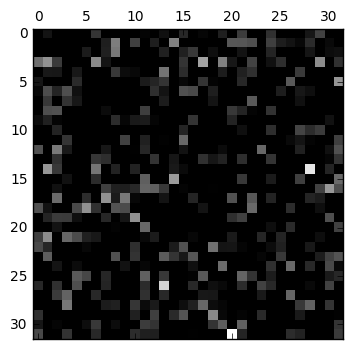

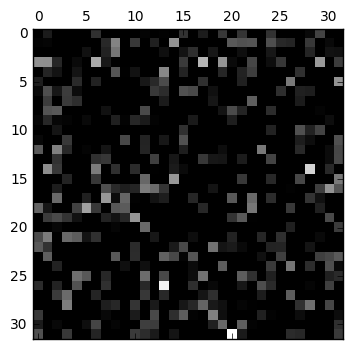

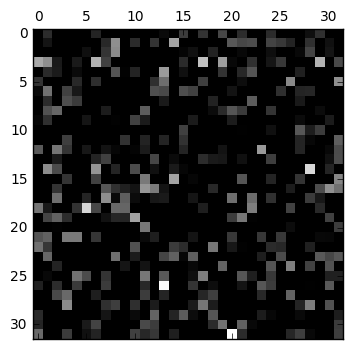

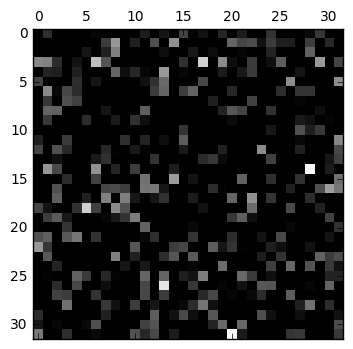

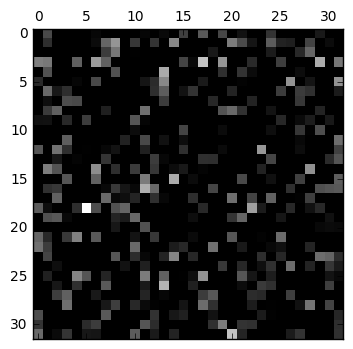

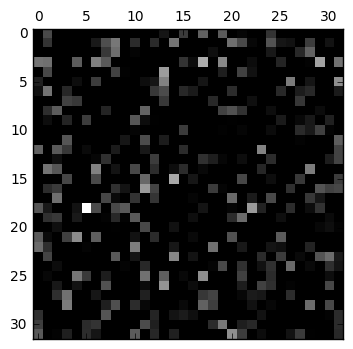

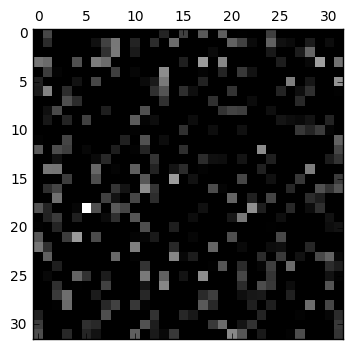

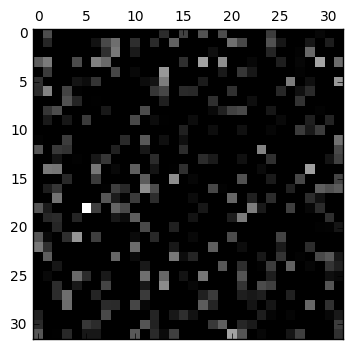

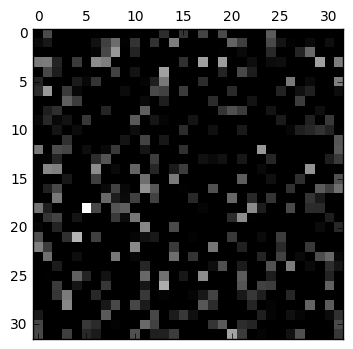

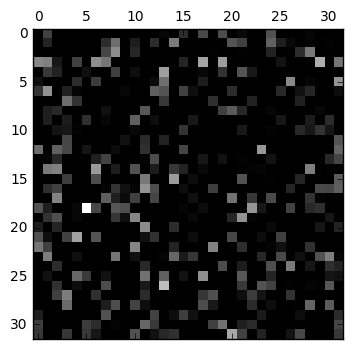

'\nfor (m,n), value in np.ndenumerate(sess.run(sys_prediction, feed_dict={x: array(test_data), keep_prob: 1.0})):\n    if n == 0:\n        print m\n        if m != 0:\n            out +="]"\n        out += "["\n    out += str(value)+","\nout += "]]"\n\nwith open("sample4_result_cnn.txt", "w") as text_file:\n    text_file.write(out)\n'

In [13]:

sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)

saver = tf.train.Saver()
# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.

# Restore variables from disk.
saver.restore(sess, "/notebooks/cnnmodel.ckpt")
print("Model restored.")

#print array(test_data)
#print sess.run(sys_prediction, feed_dict={x: array(test_data), keep_prob: 1.0})

print sess.run(h_fc1, feed_dict={x: array(test_data[:2]), keep_prob: 1.0})


myfc = sess.run(h_fc1, feed_dict={x: array(test_data[:10]), keep_prob: 1.0})
myweight = sess.run(W_fc2)
camval = sess.run(mlp(x, weights, biases, keepprob)['conv2'],
                feed_dict={x: testimg, keepprob: 1.})


#myweight = np.fliplr(myweight)
#myweight = np.rot90(myweight)

print len(myfc)

for i in myfc:
    item = np.reshape(i,(32,32))
    plt.matshow(item, cmap=plt.get_cmap('gray'))

plt.show()

#print sys_prediction.eval(sess,feed_dict={x: array(test_data)})
#out = "["

"""
for (m,n), value in np.ndenumerate(sess.run(sys_prediction, feed_dict={x: array(test_data), keep_prob: 1.0})):
    if n == 0:
        print m
        if m != 0:
            out +="]"
        out += "["
    out += str(value)+","
out += "]]"

with open("sample4_result_cnn.txt", "w") as text_file:
    text_file.write(out)
"""

#print(sess.run(tf.all_variables()))

